# US Accidents Analysis Project

#### Prepared by: Raneem Alhumaidan



## Abstract
The project has two goals, first, it will strive for understanding the cause and effect rules of the accidents to analyze and generate insights on the traffic accidents and key factors affecting the accidents, also perform data visualization, to describe this data more vividly. Second, build several machine learning models: Accurately predict accident severity and predict street side of an accident in the United State, in order to help and understand to identify the patterns of how these serious accidents happen.




### Dataset 

US-Accident dataset is a countrywide car accident dataset, which covers 49 states of the United States. It contains more than 4 million cases of traffic accidents that took place from February 2016 to December 2020. In this project, however, only the data of accidents that happened after February 2019 and were reported by MapQuest was finally used in exploration analysis and modeling so that irrelevant factors can be eliminated to the greatest extent.

### Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

### Data Source
https://www.kaggle.com/sobhanmoosavi/us-accidents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pygal
from pygal.style import LightGreenStyle
import plotly.express as px

from bokeh.plotting import figure, show

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import plotly.express as px
import pandas_bokeh
from bokeh.sampledata.autompg import autompg as df
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show

from bokeh.themes import built_in_themes
from bokeh.io import show, output_notebook, curdoc, output_file

from bokeh.models.formatters import NumeralTickFormatter
from bokeh.models import Label, Title, NumeralTickFormatter

from bokeh.models import Range1d




pandas_bokeh.output_notebook()



import folium
from folium import plugins
from folium.plugins import HeatMap




from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

Loading BokehJS ...

In [2]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe

In [ ]:
df.columns

# Data Preparation

In [3]:
# Take the Features that I need to work with it
 
accident_df = df

accident_df = accident_df.drop(['Zipcode' ,'Airport_Code', 'Bump' , 'Crossing' , 'Give_Way', 'Junction',
           'No_Exit','Railway', 'Roundabout','Station','Traffic_Calming','Traffic_Signal',
                                'Stop','Turning_Loop','Astronomical_Twilight', 'Amenity' , 'Precipitation(in)'  , 'Nautical_Twilight' ,'Civil_Twilight' , 'Timezone', 'Wind_Direction', 'Number' , 'Weather_Timestamp', 'Wind_Speed(mph)' ],  axis=1)


In [4]:
accident_df.shape

(1516064, 23)

In [5]:
accident_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Country', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition',
       'Sunrise_Sunset'],
      dtype='object')

In [ ]:
accident_df.head()

# Data Cleaning & EDA

In [ ]:
accident_df.dtypes

In [6]:
# Check # of NAN Value
accident_df.isnull().sum().sort_values(ascending=False)

Wind_Chill(F)        449316
Humidity(%)           45509
Visibility(mi)        44211
Weather_Condition     44007
Temperature(F)        43033
Pressure(in)          36274
Sunrise_Sunset           83
City                     83
Country                   0
State                     0
County                    0
ID                        0
Severity                  0
Street                    0
Description               0
Distance(mi)              0
End_Lng                   0
End_Lat                   0
Start_Lng                 0
Start_Lat                 0
End_Time                  0
Start_Time                0
Side                      0
dtype: int64

In [7]:
# Delet null value 
accident_df=accident_df.dropna()

In [8]:
# Check Again to see there is NAN value or not 
accident_df.isnull().sum().sort_values(ascending=False)

ID                   0
City                 0
Weather_Condition    0
Visibility(mi)       0
Pressure(in)         0
Humidity(%)          0
Wind_Chill(F)        0
Temperature(F)       0
Country              0
State                0
County               0
Side                 0
Severity             0
Street               0
Description          0
Distance(mi)         0
End_Lng              0
End_Lat              0
Start_Lng            0
Start_Lat            0
End_Time             0
Start_Time           0
Sunrise_Sunset       0
dtype: int64

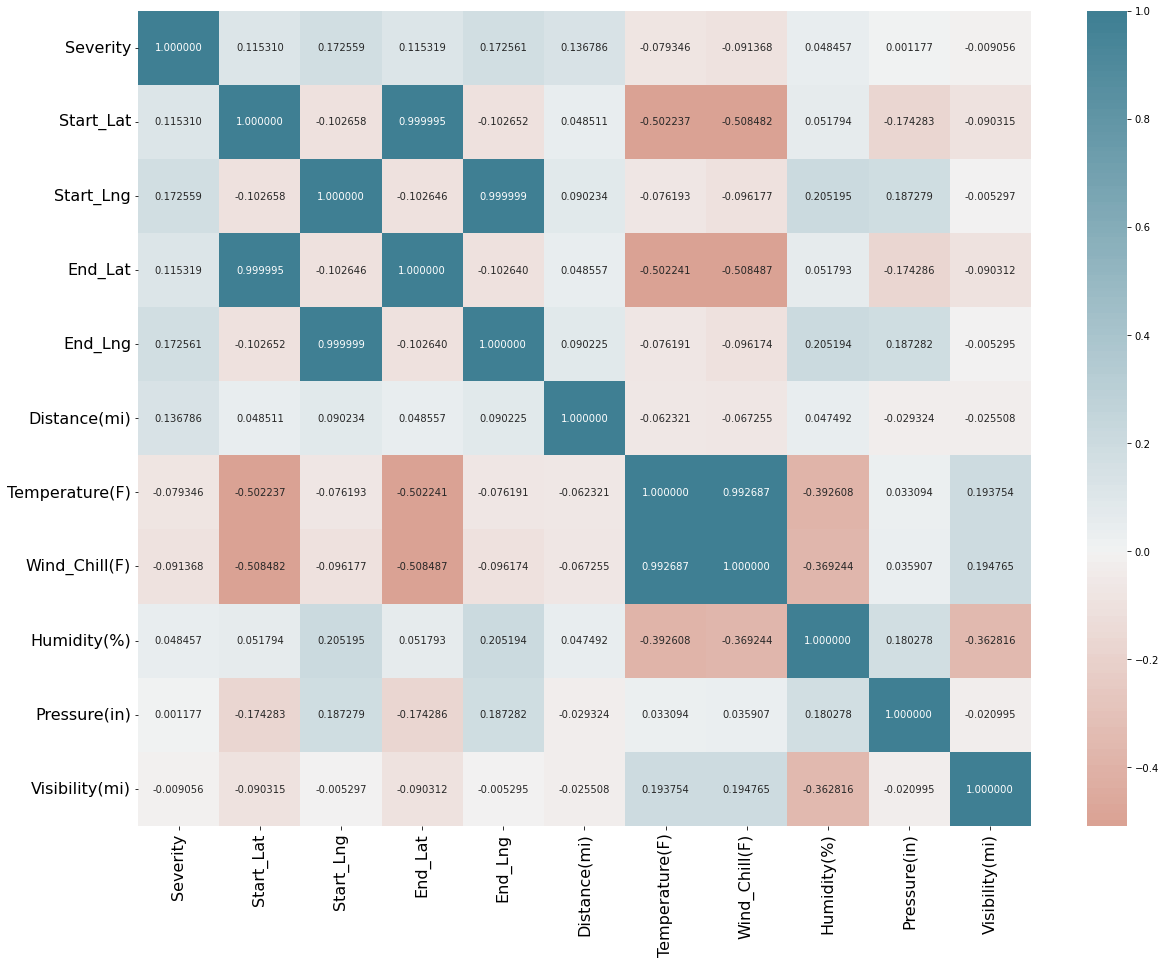

In [9]:
cmap = sns.diverging_palette(20, 220, n=200)
fig= sns.heatmap(accident_df.corr(),cmap=cmap, annot=True, fmt="f",center=0)
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## - Heat MAP of number of accidents 

In [10]:
# blugrn - bluyl - brwnyl - bugn - bupu - burg - burgyl - darkmint - emrld - greys - magenta - mint

fig = go.Figure(
    data=go.Choropleth(
        locations = pd.value_counts(accident_df['State']).index, 
        z = pd.value_counts(accident_df['State']).values.astype(float), 
        locationmode = 'USA-states', 
        colorscale = 'mint', 
        colorbar_title = " Accident Counts"), 

    
    
    layout=go.Layout(
        title_text='Accidents Counts by States 2016 - 2020', 
        title_x=0.5, 
        font=dict(family='Calibri', size=14, color='MidnightBlue'), 
        geo_scope='usa'))

fig.show()

## - TOP 10 State, Count and City had an accidents:

In [11]:
# Number of State 
state = accident_df.State.unique()
len(state)

49

In [12]:
# What are the unique 'State' of US where accidents have taken place?
state = accident_df['State'].value_counts()
#state.head(10)

In [13]:
state = accident_df['State'].unique()
state = pd.DataFrame()
# state.head(10)

state = accident_df.groupby(['State']).count().sort_values(by = "ID" , ascending= False).iloc[:,[0]]
state = state.reset_index()
state.rename(columns={'ID': '#Accident'}, inplace=True)
# state.head(49)

In [15]:

x = state.State
y = state['#Accident']

curdoc().theme = 'caliber'

p = figure(x_range=x[:10],width=800, height=500, title="Top States have Number of Accident" 
           ,toolbar_location=None, tools="")
p.yaxis.formatter = NumeralTickFormatter(format="0,0")
p.vbar(x=x, top=y, width=.5, color="grey")

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [16]:
# Number of County 
county = df.County.unique()
len(county)

1671

In [17]:
# What are the unique 'County' of US where accidents have taken place?
county = accident_df['County'].value_counts()
#county.head(10)

In [18]:
county = accident_df['County'].unique()
county = pd.DataFrame()

county = accident_df.groupby(['County']).count().sort_values(by = "ID" , ascending= False).iloc[:,[0]]
county = county.reset_index()
county.rename(columns={'ID': '#Accident'}, inplace=True)
# county.head(10)

In [19]:

x = county.County
y = county['#Accident']



curdoc().theme = 'caliber'


p = figure(x_range=x[:10],width=800, height=500, title="Top County have Number of Accident" 
           ,toolbar_location=None, tools="")

p.yaxis.formatter = NumeralTickFormatter(format="0,0")


p.vbar(x=x, top=y, width=.5, color="grey")

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [20]:
# Number of city 
city = accident_df.City.unique()
len(city)

9489

In [21]:
# What are the unique 'City' of US where accidents have taken place?
city = accident_df['City'].value_counts()
#city.head(10)

In [22]:
city = accident_df['City'].unique()
city = pd.DataFrame()

city = accident_df.groupby(['City']).count().sort_values(by = "ID" , ascending= False).iloc[:,[0]]
city = city.reset_index()
city.rename(columns={'ID': '#Accident'}, inplace=True)
# city.head(10)

In [24]:

x = city.City

y = city['#Accident']



curdoc().theme = 'caliber'



p = figure(x_range=x[:10],width=800, height=500, title="Top City have Number of Accident" 
           ,toolbar_location=None, tools="")
p.yaxis.formatter = NumeralTickFormatter(format="0,0")


p.vbar(x=x, top=y, width=.5, color="grey")

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

## - Show the accidents on US MAP

In [25]:
lat, lon = accident_df.Start_Lat[0], accident_df.Start_Lng[0]
lat, lon 

(40.10891, -83.09286)

In [26]:
for x in accident_df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

586533     33.996323
1085495    40.699790
1151042    34.075217
1015142    33.614681
974295     33.913040
             ...    
1486364    33.965273
576343     30.456324
1054949    34.025177
668585     38.154706
615384     33.789554
Name: Start_Lat, Length: 100, dtype: float64
586533    -117.840052
1085495   -111.890580
1151042   -118.274206
1015142   -117.707783
974295    -118.125400
              ...    
1486364   -117.326684
576343     -81.629283
1054949   -117.114751
668585    -121.675469
615384    -117.805713
Name: Start_Lng, Length: 100, dtype: float64


In [27]:
zip(list(accident_df.Start_Lat), list(accident_df.Start_Lng))

In [28]:
sample_df = accident_df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [29]:

map = folium.Map(location = [37.09024 ,-95.712891], zoom_start = 4.4)
HeatMap(lat_lon_pairs).add_to(map)
map

## - Change datatype of the Start Time & End Time 

In [30]:
accident_df.Start_Time = pd.to_datetime(accident_df.Start_Time)
accident_df.End_Time = pd.to_datetime(accident_df.End_Time)

In [31]:
accident_df.dtypes

ID                           object
Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
Distance(mi)                float64
Description                  object
Street                       object
Side                         object
City                         object
County                       object
State                        object
Country                      object
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Weather_Condition            object
Sunrise_Sunset               object
dtype: object

In [32]:
accident_df.Start_Time.head(2)

0   2016-02-08 00:37:08
5   2016-02-08 07:53:43
Name: Start_Time, dtype: datetime64[ns]

In [33]:
accident_df.End_Time.head(2)

0   2016-02-08 06:37:08
5   2016-02-08 13:53:43
Name: End_Time, dtype: datetime64[ns]

In [34]:
# Extract year, month, day, hour and weekday
accident_df['Year']=accident_df['Start_Time'].dt.year
accident_df['Month']=accident_df['Start_Time'].dt.strftime('%b')
accident_df['Day']=accident_df['Start_Time'].dt.day
accident_df['Hour']=accident_df['Start_Time'].dt.hour
accident_df['Weekday']=accident_df['Start_Time'].dt.strftime('%a')

In [35]:
accident_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Humidity(%),Pressure(in),Visibility(mi),Weather_Condition,Sunrise_Sunset,Year,Month,Day,Hour,Weekday
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,58.0,29.76,10.0,Light Rain,Night,2016,Feb,8,0,Mon
5,A-2716605,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,93.0,29.69,10.0,Light Rain,Day,2016,Feb,8,7,Mon
6,A-2716606,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.063240,-84.032430,39.067310,-84.058510,1.427,At Dela Palma Rd - Accident.,...,100.0,29.66,10.0,Overcast,Day,2016,Feb,8,8,Mon
7,A-2716607,2,2016-02-08 08:16:57,2016-02-08 14:16:57,39.067080,-84.058550,39.063020,-84.032540,1.423,At Dela Palma Rd - Accident.,...,100.0,29.66,10.0,Overcast,Day,2016,Feb,8,8,Mon
9,A-2716609,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,At Bagley Rd/Exit 235 - Accident.,...,92.0,29.63,0.5,Snow,Day,2016,Feb,8,11,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,40.0,28.92,10.0,Fair,Day,2019,Aug,23,18,Fri
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,73.0,29.39,10.0,Fair,Day,2019,Aug,23,19,Fri
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,64.0,29.74,10.0,Partly Cloudy,Day,2019,Aug,23,19,Fri
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,81.0,29.62,10.0,Fair,Day,2019,Aug,23,19,Fri


## - New feature Amount of time in the unit of minutes for each accident

In [36]:
accident_df['Time_Duration(min)']=round((accident_df['End_Time'] - accident_df['Start_Time'])/np.timedelta64(1,'m'))

In [ ]:
accident_df.info()

In [ ]:
accident_df.head(1)

In [37]:
# Check if there is any negative time_duration values
accident_df['Time_Duration(min)'][accident_df['Time_Duration(min)']<=0]

Series([], Name: Time_Duration(min), dtype: float64)

In [38]:
neg_outliers=accident_df['Time_Duration(min)']<=0

# Set outliers to NAN
accident_df[neg_outliers] = np.nan

# Drop rows with negative td
accident_df.dropna(subset=['Time_Duration(min)'],axis=0,inplace=True)


In [ ]:
accident_df.info()

In [39]:
# Remove outliers for Time_Duration(min): n * std (n=3), 

n=3
median = accident_df['Time_Duration(min)'].median()
std = accident_df['Time_Duration(min)'].std()
outliers = (accident_df['Time_Duration(min)'] - median).abs() > std*n

# Set outliers to NULL
accident_df[outliers] = np.nan

# Fill with median
accident_df['Time_Duration(min)'].fillna(median, inplace=True) 

In [40]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058882 entries, 0 to 1516063
Data columns (total 29 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ID                  1058354 non-null  object        
 1   Severity            1058354 non-null  float64       
 2   Start_Time          1058354 non-null  datetime64[ns]
 3   End_Time            1058354 non-null  datetime64[ns]
 4   Start_Lat           1058354 non-null  float64       
 5   Start_Lng           1058354 non-null  float64       
 6   End_Lat             1058354 non-null  float64       
 7   End_Lng             1058354 non-null  float64       
 8   Distance(mi)        1058354 non-null  float64       
 9   Description         1058354 non-null  object        
 10  Street              1058354 non-null  object        
 11  Side                1058354 non-null  object        
 12  City                1058354 non-null  object        
 13  County      

In [41]:
# check if there is a null value
accident_df.isnull().sum().sort_values(ascending=False)

ID                    528
Country               528
Weekday               528
Hour                  528
Day                   528
Month                 528
Year                  528
Sunrise_Sunset        528
Weather_Condition     528
Visibility(mi)        528
Pressure(in)          528
Humidity(%)           528
Wind_Chill(F)         528
Temperature(F)        528
State                 528
Severity              528
County                528
City                  528
Side                  528
Street                528
Description           528
Distance(mi)          528
End_Lng               528
End_Lat               528
Start_Lng             528
Start_Lat             528
End_Time              528
Start_Time            528
Time_Duration(min)      0
dtype: int64

In [42]:
accident_df.dropna(inplace=True)

## Max time to clear an accident

In [43]:
accident_df['Time_Duration(min)'].sort_values(ascending = False).head()

471362    13809.0
250851    13809.0
713037    13809.0
593032    13809.0
335106    13592.0
Name: Time_Duration(min), dtype: float64

In [44]:
accident_df['Time_Duration(min)'].sort_values(ascending = False).tail()

434859    6.0
356687    6.0
634209    6.0
489402    6.0
763161    5.0
Name: Time_Duration(min), dtype: float64

In [45]:
max_time_minutes = accident_df['Time_Duration(min)'].max()
max_time_hours = round(accident_df['Time_Duration(min)'].max()/60)
max_time_days = round(accident_df['Time_Duration(min)'].max()/60/24)
min_time_minutes = accident_df['Time_Duration(min)'].min()

print('Max time to clear an accident by {} minutes ' .format(max_time_minutes))
print('Max time to clear an accident by {} hours ' .format(max_time_hours))
print('Max time to clear an accident by {} days ' .format(max_time_days))
print('Min time to clear an accident by {} minutes ' .format(min_time_minutes))



Max time to clear an accident by 13809.0 minutes 
Max time to clear an accident by 230 hours 
Max time to clear an accident by 10 days 
Min time to clear an accident by 5.0 minutes 


In [46]:
accident_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Country', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition',
       'Sunrise_Sunset', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'Time_Duration(min)'],
      dtype='object')

## Dose the weekend affect the number of accidents (New Feature)

In [47]:
accident_df['Is_Weekend'] = accident_df['Start_Time'].dt.weekday > 4

In [48]:
# Show number of accidents in weekday and weekend
weekend = accident_df.Is_Weekend
weekend = accident_df.groupby([weekend]).count().sort_values(by = "ID").iloc[:,[0]]
weekend = weekend.reset_index()
weekend.rename(columns={'ID': '#Accident'}, inplace=True)

weekend

,Is_Weekend,#Accident
0,True,212153
1,False,846201


## - Dose the weekend affect the severity of accidents 

In [49]:
# Show severity of accidents in weekday and weekend
weekend_Severity = accident_df.groupby(['Is_Weekend','Severity']).count().sort_values(by = "ID").iloc[:,[0]]
weekend_Severity = weekend_Severity.reset_index()
weekend_Severity.rename(columns={'ID': '#Accident'}, inplace=True)
weekend_Severity

,Is_Weekend,Severity,#Accident
0,True,1.0,4294
1,True,4.0,12675
2,True,3.0,14449
3,False,1.0,23280
4,False,4.0,47179
5,False,3.0,70266
6,True,2.0,180735
7,False,2.0,705476


## - What times with the most accidents? 

In [50]:
# Show the time that has most accidents 
time = accident_df.Start_Time.dt.hour
hour_time = time
hour_time = pd.DataFrame()
# state.head(10)

hour_time = accident_df.groupby(time).count().sort_values(by = "ID" ).iloc[:,[0]]
hour_time = hour_time.reset_index()
hour_time.rename(columns={'Start_Time': 'Time' , 'ID': '#Accident'}, inplace=True)
# hour_time

In [51]:
hour_time = hour_time.sort_values('Time')

In [53]:

data = hour_time['Time']
top = hour_time['#Accident']

hist, edges = np.histogram(data, bins=10)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
 

p = figure(title="Plot sizing example", width=800, height=500)
p.yaxis.formatter = NumeralTickFormatter(format="0,0")


p.quad(top=top, bottom=0, left=edges[:-1] , right=edges[1:] , line_color="white",color="grey")

show(p)




/Users/raneem/opt/anaconda3/lib/python3.9/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('left', 10), ('top', 24)

/Users/raneem/opt/anaconda3/lib/python3.9/site-packages/bokeh/models/sources.py:205: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('left', 10), ('right', 10), ('top', 24)



## - Compare number of accidents of each year [2016, 2017, 2018, 2019, 2020] 

In [54]:
times = pd.to_datetime(accident_df.Start_Time)
times = accident_df.groupby([times.dt.year]).count().sort_values(by = "ID").iloc[:,[0]]
times = times.reset_index()
#times

In [55]:
# Change coloumn name

times['Start_Time'] = pd.to_numeric(times['Start_Time'], downcast='signed')
times.rename(columns={'Start_Time': 'Year' ,  'ID': '#Accident'}, inplace=True)
times = times.sort_values('Year')
#times

In [56]:

x = times['Year']
y = times['#Accident']

p = figure(title='Number of Accidents', width=800, height=500)
p.yaxis.formatter = NumeralTickFormatter(format="0,0")


p.line(x, y)
show(p)

## - Compare number of accedint in Day & Night

In [57]:
day_night = accident_df.Sunrise_Sunset
day_night = accident_df.groupby([day_night]).count().sort_values(by = "ID").iloc[:,[0]]
day_night = day_night.reset_index()

In [58]:
# Change coloumn name
day_night.rename(columns={'Sunrise_Sunset': 'Day/Night', 'ID': '#Accident'}, inplace=True)
day_night

,Day/Night,#Accident
0,Night,480572
1,Day,577782


In [59]:
day_night.columns

Index(['Day/Night', '#Accident'], dtype='object')

In [61]:
from bokeh.io import curdoc
from bokeh.sampledata.autompg import autompg as df
from bokeh.themes import built_in_themes
output_notebook()

x = day_night['Day/Night']
y = day_night['#Accident']

curdoc().theme = 'caliber'


p = figure(x_range=x[:10],width=800, height=500, title="Number of accedint in Day & Night" 
           ,toolbar_location=None, tools="")

p.yaxis.formatter = NumeralTickFormatter(format="0,0")

p.vbar(x=x, top=y, width=.5, color="grey")

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

Loading BokehJS ...

## In which Side most of the accidents occurred 

In [62]:
side = accident_df.Side
side=accident_df.groupby([side]).count().sort_values(by = "ID").iloc[:,[0]]
side=side.reset_index()

In [63]:
side.rename(columns={'ID': '#Accident'}, inplace=True)

In [64]:
side

,Side,#Accident
0,L,168373
1,R,889981


In [65]:
x = side['Side']
y = side['#Accident']


curdoc().theme = 'caliber'


p = figure(x_range=x[:10],width=800, height=500, title="Most accidents Side occurred " 
           ,toolbar_location=None, tools="")

p.yaxis.formatter = NumeralTickFormatter(format="0,0")

p.vbar(x=x, top=y, width=.5, color="#bababa")

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

## - Compare number of accedint in severity

In [66]:
# How the severity of accedint affect 

severity = accident_df.Severity
severity=accident_df.groupby([severity]).count().sort_values(by = "ID").iloc[:,[0]]
severity=severity.reset_index()


In [67]:
# Change coloumn name
severity.rename(columns={'ID': '#Accident'}, inplace=True)
#severity

In [69]:

x = severity['Severity']
y = severity['#Accident']

curdoc().theme = 'caliber'


p = figure(width=800, height=500, title="" 
           ,toolbar_location=None, tools="")
p.yaxis.formatter = NumeralTickFormatter(format="0,0")


p.vbar(x=x, top=y, width=.5, color="grey")

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

## - Show the severity of the accidents during the day or night

In [70]:
day_severity = accident_df.groupby(['Severity', 'Sunrise_Sunset'] ).count().sort_values(by = "ID" ,ascending = False).iloc[:,[0]]
day_severity = day_severity.reset_index()

In [71]:
# Change coloumn name
day_severity.rename(columns={'Sunrise_Sunset': 'Day/Night', 'ID': '#Accident'}, inplace=True)
day_severity

,Severity,Day/Night,#Accident
0,2.0,Day,461013
1,2.0,Night,425198
2,3.0,Day,59702
3,4.0,Day,34165
4,4.0,Night,25689
5,3.0,Night,25013
6,1.0,Day,22902
7,1.0,Night,4672


## - Average Accedints Sevrity by ever state

/Users/raneem/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/raneem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



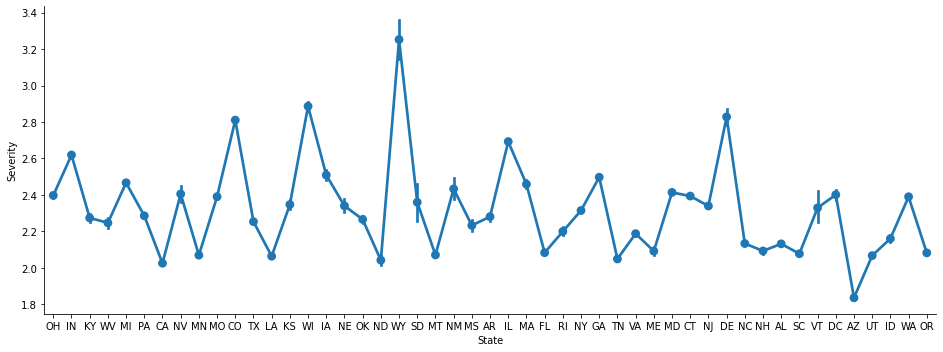

In [72]:
import matplotlib.pyplot as plt


sns.factorplot('State','Severity', data=accident_df)
fig=plt.gcf()
fig.set_size_inches(15,5)


plt.show()

In [73]:
state_severity = accident_df['State'] ,['Severity']
state_severity=accident_df.groupby(['State' ,'Severity']).count().sort_values(by = "ID" ,ascending=False).iloc[:,[0]]
state_severity=state_severity.reset_index()

In [74]:
state_severity.loc[state_severity['Severity']==4]

,State,Severity,ID
31,NY,4.0,4487
35,PA,4.0,3813
36,FL,4.0,3725
37,CA,4.0,3635
38,MI,4.0,3309
39,MD,4.0,3175
40,GA,4.0,3105
42,VA,4.0,3054
51,OR,4.0,2539
57,CO,4.0,2276


## - Weather Condition Affecte

In [75]:
wheather = accident_df.Weather_Condition
wheather = accident_df.groupby([wheather]).count().sort_values(by = "ID", ascending=False).iloc[:,[0]]
wheather = wheather.reset_index()
# wheather.head()

In [76]:
wheather.rename(columns={'ID': '#Accident'}, inplace=True)
# wheather.head()

In [77]:
x = wheather.Weather_Condition

y = wheather['#Accident']


curdoc().theme = 'caliber'


p = figure(x_range=x[:10],width=800, height=500, title="Weather Condition Affected" 
           ,toolbar_location=None, tools="")
p.yaxis.formatter = NumeralTickFormatter(format="0,0")


p.vbar(x=x, top=y, width=.5, color="#bababa")

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

## - New dataframe to use it in the model

In [78]:
# list of features for Molding 

col_list=['Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State',
             'Visibility(mi)','Weather_Condition',
             'Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [79]:
select_df = accident_df[col_list].copy()
# select_df.head(2)

## - Select the data of New York  to use it in the model 

In [80]:
# Set state
state='CA'

# Select the state of New York
df_state=select_df.loc[accident_df.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
# df_state.head()

In [ ]:
# Set county 
county='Los Angeles'

df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
# df_county

In [81]:
# Generate dummies for categorical data
df_dummy = pd.get_dummies(df_state,drop_first=True)


# df_dummy = pd.get_dummies(df_county,drop_first=True)

# df_dummy.info()

In [82]:
df_dummy.shape

(324400, 1167)

In [83]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324400 entries, 1018 to 1516063
Columns: 1167 entries, Severity to Weekday_Wed
dtypes: float64(7), uint8(1160)
memory usage: 378.7 MB


In [84]:
col = df_dummy.select_dtypes(exclude=['float']).columns

df_dummy[col] = df_dummy[col].apply(pd.to_numeric, downcast='float', errors='coerce')

In [ ]:
df_dummy.dtypes

# Modle:

### Predict the accident severity

In [85]:
df_sample= df_dummy

# Set the target for the prediction
target='Severity'


# Create arrays for the features and the response variable

# set X and y
y = df_sample[target]
X = df_sample.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [86]:
# List of classification algorithms
algo_lst=['Logistic Regression','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

## Logistic regression

In [87]:
# Logistic regression
lr = LogisticRegression(random_state=0,class_weight='balanced',n_jobs=-1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Get the accuracy score
# acc=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
# Append to the accuracy list
# accuracy_lst.append(acc)

# print("accuracy_score: {:.3f}.".format(acc))

/Users/raneem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.16      0.93      0.27      1637
         2.0       0.99      0.45      0.62     92673
         3.0       0.04      0.57      0.07      1921
         4.0       0.02      0.24      0.03      1089

    accuracy                           0.46     97320
   macro avg       0.30      0.55      0.25     97320
weighted avg       0.95      0.46      0.59     97320



## Decision tree algorithm

In [88]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=1, class_weight='balanced')


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
# print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
# accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
# acc=accuracy_gini
# accuracy_lst.append(acc)
print(classification_report(y_test, y_pred))


# Print accuracy_gini
# print('[Decision Tree -- gini] accuracy_score: ', format(accuracy_gini))

              precision    recall  f1-score   support

         1.0       0.67      0.73      0.70      1637
         2.0       0.97      0.99      0.98     92673
         3.0       0.41      0.13      0.19      1921
         4.0       0.61      0.12      0.20      1089

    accuracy                           0.96     97320
   macro avg       0.67      0.49      0.52     97320
weighted avg       0.95      0.96      0.95     97320



## Random Forest algorithm

In [89]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,class_weight='balanced',n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
# acc=accuracy_score(y_test, y_pred)

# Append to the accuracy list
# accuracy_lst.append(acc)
print(classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
# print("Randon Forest Algorithm Accuracy Score: " ,format(acc))

              precision    recall  f1-score   support

         1.0       0.85      0.66      0.75      1637
         2.0       0.97      1.00      0.98     92673
         3.0       0.71      0.18      0.28      1921
         4.0       0.77      0.30      0.43      1089

    accuracy                           0.97     97320
   macro avg       0.83      0.53      0.61     97320
weighted avg       0.96      0.97      0.96     97320



In [90]:
important_feau = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
# important_feau

In [ ]:
important_feau.index

In [91]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.04
sfm = SelectFromModel(clf, threshold=0.04)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Distance(mi)
Hour
Time_Duration(min)


In [92]:
#### Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)


# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)




RandomForestClassifier(n_jobs=-1, random_state=0)

In [93]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
# print('CLF Full feature -- accuracy_score: ',format(accuracy_score(y_test, y_pred)))
print('For the full feature',classification_report(y_test, y_pred))


# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)
print('For the Selected feature',classification_report(y_test, y_important_pred))


# View The Accuracy Of Our Limited Feature Model
# print('CLF S feature -- accuracy_score: ' , format(accuracy_score(y_test, y_important_pred)))

For the full feature               precision    recall  f1-score   support

         1.0       0.85      0.66      0.75      1637
         2.0       0.97      1.00      0.98     92673
         3.0       0.71      0.18      0.28      1921
         4.0       0.77      0.30      0.43      1089

    accuracy                           0.97     97320
   macro avg       0.83      0.53      0.61     97320
weighted avg       0.96      0.97      0.96     97320

For the Selected feature               precision    recall  f1-score   support

         1.0       0.73      0.76      0.75      1637
         2.0       0.98      0.99      0.99     92673
         3.0       0.51      0.25      0.34      1921
         4.0       0.63      0.36      0.46      1089

    accuracy                           0.97     97320
   macro avg       0.71      0.59      0.63     97320
weighted avg       0.96      0.97      0.96     97320



In [ ]:
# list of algorithms and accuracy scores 
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy Score']).sort_values(by=['Accuracy Score'],ascending = True)

In [ ]:
df_acc.sort_values(by ='Accuracy Score', ascending = False)

## - Predict the Accident in right side or not 

In [94]:
sample2_df= df_dummy

# Set the target for the prediction
target='Side_R'


# Create arrays for the features and the response variable

y = sample2_df[target]
X = sample2_df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=23)

In [95]:
# List of classification algorithms
algo_lst=['Logistic Regression','Decision Trees','Random Forest']
# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

## Logistic regression

In [96]:
# Logistic regression
lr = LogisticRegression(random_state=0,class_weight='balanced',n_jobs=-1)
lr.fit(X_train2,y_train2)
y_pred=lr.predict(X_test2)

# Get the accuracy score
acc=accuracy_score(y_test2, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)
print(classification_report(y_test2, y_pred))


print("accuracy_score: {:.3f}.".format(acc))

/Users/raneem/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.18      0.63      0.28     11233
           1       0.93      0.62      0.75     86087

    accuracy                           0.63     97320
   macro avg       0.55      0.63      0.51     97320
weighted avg       0.84      0.63      0.69     97320

accuracy_score: 0.625.


## Decision tree algorithm

In [97]:
# Decision tree algorithm

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1,class_weight='balanced')


# Fit dt_entropy to the training set
dt_entropy.fit(X_train2, y_train2)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test2)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test2, y_pred)


# Print accuracy_entropy
# print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))



# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


dt_gini.fit(X_train2, y_train2)
y_pred= dt_gini.predict(X_test2)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test2, y_pred)

acc=accuracy_gini
accuracy_lst.append(acc)
print(classification_report(y_test2, y_pred))


# Print accuracy_gini
# print('[Decision Tree -- gini] accuracy_score: ', format(accuracy_gini))

              precision    recall  f1-score   support

           0       0.73      0.04      0.07     11233
           1       0.89      1.00      0.94     86087

    accuracy                           0.89     97320
   macro avg       0.81      0.52      0.51     97320
weighted avg       0.87      0.89      0.84     97320



## Random Forest algorithm

In [98]:
# Random Forest algorithm


clf=RandomForestClassifier(n_estimators=100, random_state=1,class_weight='balanced')

clf.fit(X_train2,y_train2)
y_pred=clf.predict(X_test2)


# accuracy score
acc=accuracy_score(y_test2, y_pred)
accuracy_lst.append(acc)
print(classification_report(y_test2, y_pred))




# print("Randon Forest Algorithm Accuracy Score: " ,format(acc))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40     11233
           1       0.91      0.99      0.95     86087

    accuracy                           0.91     97320
   macro avg       0.85      0.63      0.67     97320
weighted avg       0.90      0.91      0.89     97320



In [99]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.06
sfm = SelectFromModel(clf, threshold=0.06)

# Train the selector
sfm.fit(X_train2, y_train2)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Distance(mi)
Hour
Time_Duration(min)


In [100]:
#### Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train2)
X_important_test = sfm.transform(X_test2)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train2)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [101]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test2)

# View The Accuracy Of Our Full Feature Model
# print('CLF (Full feature) -- accuracy_score: ',format(accuracy_score(y_test2, y_pred)))
print('For the Full feature',classification_report(y_test2, y_pred))


# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)
print('For the Selected feature',classification_report(y_test2, y_important_pred))


# View The Accuracy Of Our Limited Feature Model
# print('CLF Limited feature) -- accuracy_score: ' , format(accuracy_score(y_test2, y_important_pred)))

For the Full feature               precision    recall  f1-score   support

           0       0.80      0.27      0.40     11233
           1       0.91      0.99      0.95     86087

    accuracy                           0.91     97320
   macro avg       0.85      0.63      0.67     97320
weighted avg       0.90      0.91      0.89     97320

For the Selected feature               precision    recall  f1-score   support

           0       0.83      0.35      0.50     11233
           1       0.92      0.99      0.95     86087

    accuracy                           0.92     97320
   macro avg       0.88      0.67      0.72     97320
weighted avg       0.91      0.92      0.90     97320



In [ ]:
# list of algorithms and accuracy scores
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy Score']).sort_values(by=['Accuracy Score'],ascending = True)

df_acc.sort_values(by ='Accuracy Score', ascending = False)